Problem Statement:

1) Recency, Frequency, Monetary or RFM analysis is a marketing model that segments customers based on their transaction history – how recently, how often, and how much money they have spent. The goal of RFM analysis is to identify which customers are the most valuable to a business.

2)A retail company wants to improve its marketing efforts by identifying and targeting the most valuable customers. By implementing RFM analysis, the company aims to segment its customer base into distinct groups based on their purchasing behavior, allowing for more personalized and effective marketing strategies.

3) To enhance customer segmentation and improve targeted marketing strategies by analyzing customer purchase behaviors using the Recency, Frequency, and Revenue (RFM) model.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
"""-
problem statements:-
    (1)customer sgementation On the basis of -RFM
    (2)Calculate the customer value
    (3)segment the invoice frequency on the basis of days, month,season, time
    (4)Top selling products
    (5)Top selling product at country level.
"""
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_excel('/content/drive/My Drive/ML Data Science/Online_shopping.xlsx')

In [8]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


This will return a Series where the index is the unique values from the Country column and the values are the normalized counts (proportions).

In [10]:
df['Country'].value_counts(normalize=True)

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [12]:
df1=df.copy()

to calculate the recency, Frequency, Monetary we want only invoice no,customer id, unit price, quantity

In [19]:
# dropping the columns which are not important.
df1=df1.drop(['StockCode','Description','Country','lower'],axis=1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [14]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [20]:
#Dropping all null values with axis=0 (Rows)
df1.dropna(axis=0,how='any',inplace=True)
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [22]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [23]:
df1[df1['UnitPrice']==0]['UnitPrice'].count()

40

In [28]:
df1[df1['UnitPrice']==0].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0


In [29]:
df1=df1[(df1['Quantity']>0)]
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397924.0,13.021823,1.0,2.0,6.0,12.0,80995.0,180.42021
InvoiceDate,397924,2011-07-10 23:43:36.912475648,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397924.0,3.116174,0.0,1.25,1.95,3.75,8142.75,22.096788
CustomerID,397924.0,15294.315171,12346.0,13969.0,15159.0,16795.0,18287.0,1713.169877


In [30]:
df1.shape

(397924, 5)

create a new column Total in DataFrame which is calculated by multiplying the Quantity column with the UnitPrice column.

In [31]:
df1['Total']=df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [32]:
df2=df1.drop(['Quantity','UnitPrice'],axis=1)
df2.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
95,536378,2010-12-01 09:37:00,14688.0,15.30
96,536378,2010-12-01 09:37:00,14688.0,50.40
97,536378,2010-12-01 09:37:00,14688.0,13.20
98,536378,2010-12-01 09:37:00,14688.0,13.20


The code snippet effectively groups transactional data by "InvoiceNo" and "CustomerID" and "InvoiceDate and calculates the total purchase amounts for each unique combination of these three columns, providing a summarized view of customer transactions.

In [39]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [40]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [42]:
#Latest date of this data set
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [43]:
#starting date of this data set
min(df_final['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [44]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

we have to calculate Recency , Frequency , Monetary.

Recency --- difference between last invoice date and latest date.

Frequency---count of invoice no... wr.r customer id.

Monetary --- sum of total wrt to customer id.

In [45]:
RFMScore=df_final.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,'InvoiceNo':lambda x:x.count(),'Total':lambda x:x.sum()}).reset_index()

In [47]:
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [48]:
RFMScore=RFMScore.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'Monetary'})

In [49]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## Just plot the graph to decide the bench mark

# ECDF plot Emperical cumulative distribution function

<Axes: xlabel='Recency', ylabel='Proportion'>

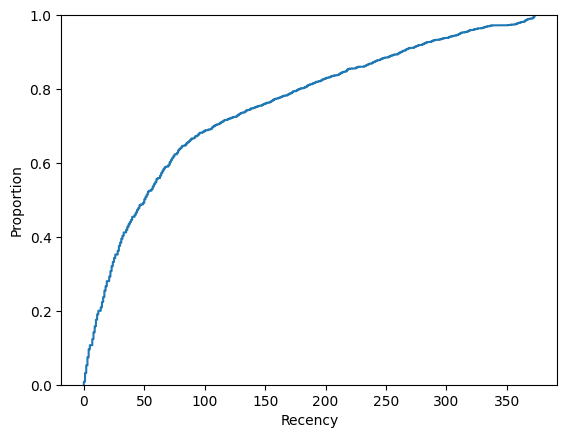

In [50]:
sns.ecdfplot(data=RFMScore['Recency'])

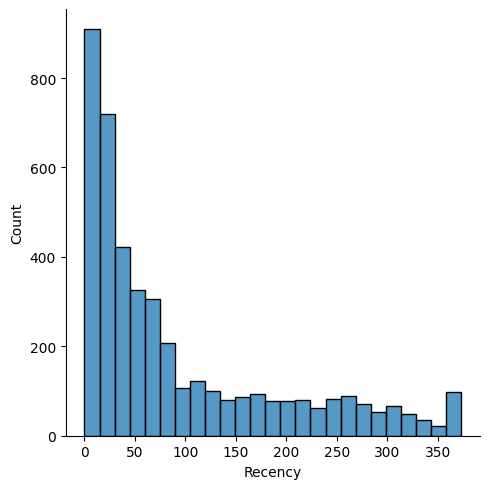

In [52]:
sns.displot(x=RFMScore['Recency'])

In [53]:
RFMScore['Recency'].quantile(q=[0.25,0.50,0.75])

0.25     17.0
0.50     50.0
0.75    141.5
Name: Recency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Proportion'>

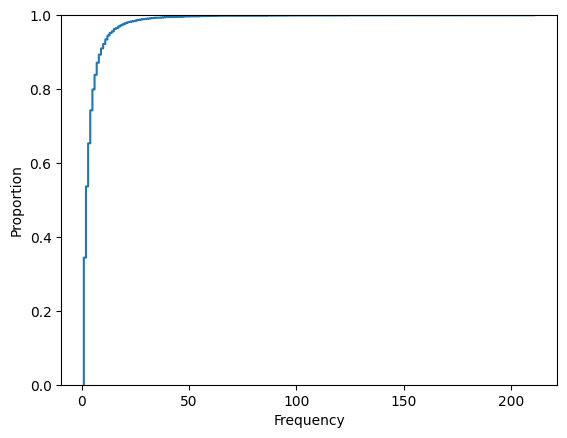

In [54]:
sns.ecdfplot(data=RFMScore['Frequency'])

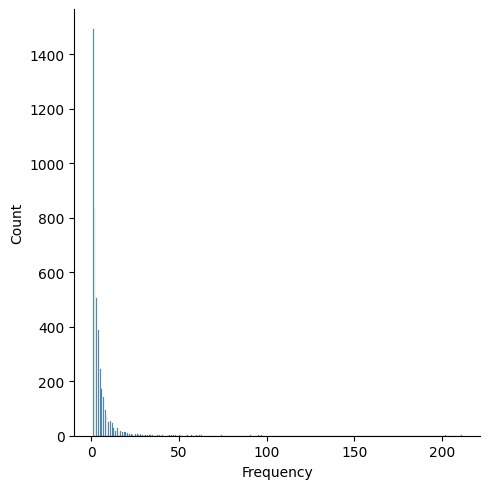

In [55]:
sns.displot(x=RFMScore['Frequency'])

In [56]:
RFMScore['Frequency'].quantile(q=[0.25,0.50,0.75])

0.25    1.0
0.50    2.0
0.75    5.0
Name: Frequency, dtype: float64

<Axes: xlabel='Monetary', ylabel='Proportion'>

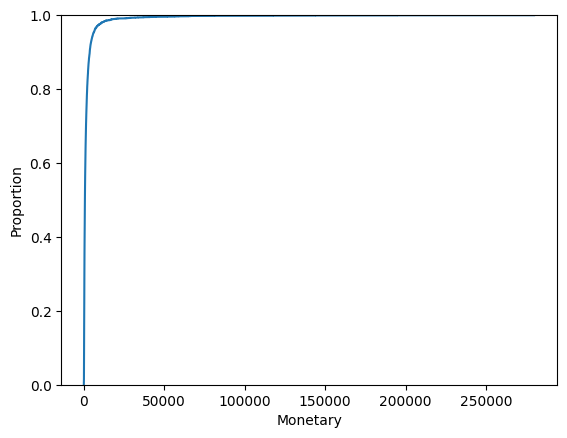

In [57]:
sns.ecdfplot(data=RFMScore['Monetary'])

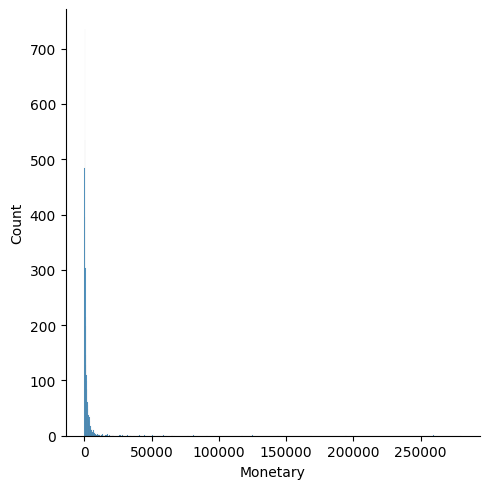

In [59]:
sns.displot(x=RFMScore['Monetary'])

In [61]:
RFMScore['Monetary'].quantile(q=[0.25,0.50,0.75])

0.25     307.245
0.50     674.450
0.75    1661.640
Name: Monetary, dtype: float64